## Motivation for this project

**There have been a recent rise in the antivaxers in most countries but especially in the developed world, this has led to a drastic reduction in the vaccination rate in these countries.
This therefore puts these countries at risk of outbreaks from vaccine preventable disease, one such is measles. The measles vaccine was one of the earliest vaccine to have been developed. Though it is relatively safe, there are alot of antivaxers who are against its used.**

**I find this dataset personal, as I believe that in the 21st century nobody should die of a vaccine preventable disease.**

# Measles

This data contains the overall and measles, mumps, and rubella immunization rates for schools across the United States. Each row corresponds to one school and includes a number of variables including the latitude, longitude, name, and vaccination rates.


## Data Dictionary

|Column    |Explanation                                                              |
| -------- | ----------------------------------------------------------------------- |
|index     | Index ID                                                                |
|state     | School's state                                                          |
|year      | School academic year                                                    |
|name      | School name                                                             |
|type      | Whether a school is public, private, charter                            |
|city      | City                                                                    |
|county    | County                                                                  |
|district  | School district                                                         |
|enroll    | Enrollment                                                              |
|mmr       | School's Measles, Mumps, and Rubella (MMR) vaccination rate             |
|overall   | School's overall vaccination rate                                       |
|xrel      | Percentage of students exempted from vaccination for religious reasons  |
|xmed      | Percentage of students exempted from vaccination for medical reasons    |
|xper      | Percentage of students exempted from vaccination for personal reasons   |

# Importing packages

In [1]:
##Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

# Loading data

In [2]:
# loading the dataset into a pandas dataFrame

df=pd.read_csv("data/measles.csv")
df

,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
0,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NaN,51.0,100.0,-1.0,NaN,NaN,NaN,31.347819,-110.938031
1,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NaN,22.0,100.0,-1.0,NaN,NaN,NaN,32.221922,-110.896103
2,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NaN,85.0,100.0,-1.0,NaN,NaN,NaN,32.130493,-111.117005
3,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NaN,60.0,100.0,-1.0,NaN,NaN,NaN,33.485447,-112.130633
4,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NaN,43.0,100.0,-1.0,NaN,2.33,2.33,33.495620,-112.224722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46406,1511,Wisconsin,2018-19,Vance Creek Amish,NaN,Prairie Farm,Barron,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,45.232586,-91.983063
46407,1512,Wisconsin,2018-19,Walnut Grove Amish,NaN,Hillpoint,Sauk,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,43.423794,-90.112525
46408,1513,Wisconsin,2018-19,Wauwatosa Virtual Academy,NaN,Wauwatosa,Milwaukee,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,43.059360,-88.063521
46409,1514,Wisconsin,2018-19,Weston Elementary,NaN,Weston,Marathon,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,44.910337,-89.571602


# Data inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46411 entries, 0 to 46410
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     46411 non-null  int64  
 1   state     46411 non-null  object 
 2   year      41730 non-null  object 
 3   name      46411 non-null  object 
 4   type      19237 non-null  object 
 5   city      29072 non-null  object 
 6   county    41253 non-null  object 
 7   district  0 non-null      float64
 8   enroll    33567 non-null  float64
 9   mmr       46411 non-null  float64
 10  overall   46411 non-null  float64
 11  xrel      94 non-null     object 
 12  xmed      12972 non-null  float64
 13  xper      6411 non-null   float64
 14  lat       44859 non-null  float64
 15  lng       44859 non-null  float64
dtypes: float64(8), int64(1), object(7)
memory usage: 5.7+ MB


In [4]:
df.describe()

,index,district,enroll,mmr,overall,xmed,xper,lat,lng
count,46411.000000,0.0,33567.000000,46411.000000,46411.000000,12972.000000,6411.000000,44859.000000,44859.000000
mean,1457.450820,NaN,120.540561,57.175585,51.571396,3.102434,6.928978,39.292245,-93.889070
std,1686.437814,NaN,161.397450,47.054632,46.786130,4.320992,8.162738,4.740087,18.528818
min,1.000000,NaN,0.000000,-1.000000,-1.000000,0.040000,0.170000,24.553269,-124.496864
25%,371.000000,NaN,39.000000,-1.000000,-1.000000,1.000000,2.700000,35.755338,-112.227597
50%,881.000000,NaN,73.000000,91.670000,83.330000,2.000000,5.000000,40.546470,-88.429408
75%,1735.000000,NaN,116.000000,98.000000,95.612018,4.000000,7.755000,42.366955,-79.927455
max,8066.000000,NaN,6222.000000,100.000000,100.000000,100.000000,169.230000,48.999955,80.205150


# Data cleaning 

In [5]:
##Some data cleaning
df.drop(columns=['district'], inplace =True)

In [6]:
df

,index,state,year,name,type,city,county,enroll,mmr,overall,xrel,xmed,xper,lat,lng
0,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,51.0,100.0,-1.0,NaN,NaN,NaN,31.347819,-110.938031
1,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,22.0,100.0,-1.0,NaN,NaN,NaN,32.221922,-110.896103
2,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,85.0,100.0,-1.0,NaN,NaN,NaN,32.130493,-111.117005
3,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,60.0,100.0,-1.0,NaN,NaN,NaN,33.485447,-112.130633
4,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,43.0,100.0,-1.0,NaN,2.33,2.33,33.495620,-112.224722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46406,1511,Wisconsin,2018-19,Vance Creek Amish,NaN,Prairie Farm,Barron,NaN,-1.0,-1.0,NaN,NaN,NaN,45.232586,-91.983063
46407,1512,Wisconsin,2018-19,Walnut Grove Amish,NaN,Hillpoint,Sauk,NaN,-1.0,-1.0,NaN,NaN,NaN,43.423794,-90.112525
46408,1513,Wisconsin,2018-19,Wauwatosa Virtual Academy,NaN,Wauwatosa,Milwaukee,NaN,-1.0,-1.0,NaN,NaN,NaN,43.059360,-88.063521
46409,1514,Wisconsin,2018-19,Weston Elementary,NaN,Weston,Marathon,NaN,-1.0,-1.0,NaN,NaN,NaN,44.910337,-89.571602


In [7]:
## Percentage of students exempted from vaccination o/a religious reasons (xrel) is made an object data type. 
df.xrel= df.xrel.astype(float)

In [8]:
### There are some NA values in the year field. So we will drop those rows.
# df.year.isna().value_counts() ### about 4681 NA
df= df.dropna(subset=['year'])
df

,index,state,year,name,type,city,county,enroll,mmr,overall,xrel,xmed,xper,lat,lng
0,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,51.0,100.0,-1.0,NaN,NaN,NaN,31.347819,-110.938031
1,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,22.0,100.0,-1.0,NaN,NaN,NaN,32.221922,-110.896103
2,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,85.0,100.0,-1.0,NaN,NaN,NaN,32.130493,-111.117005
3,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,60.0,100.0,-1.0,NaN,NaN,NaN,33.485447,-112.130633
4,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,43.0,100.0,-1.0,NaN,2.33,2.33,33.495620,-112.224722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46406,1511,Wisconsin,2018-19,Vance Creek Amish,NaN,Prairie Farm,Barron,NaN,-1.0,-1.0,NaN,NaN,NaN,45.232586,-91.983063
46407,1512,Wisconsin,2018-19,Walnut Grove Amish,NaN,Hillpoint,Sauk,NaN,-1.0,-1.0,NaN,NaN,NaN,43.423794,-90.112525
46408,1513,Wisconsin,2018-19,Wauwatosa Virtual Academy,NaN,Wauwatosa,Milwaukee,NaN,-1.0,-1.0,NaN,NaN,NaN,43.059360,-88.063521
46409,1514,Wisconsin,2018-19,Weston Elementary,NaN,Weston,Marathon,NaN,-1.0,-1.0,NaN,NaN,NaN,44.910337,-89.571602


# UNIVARIATE Analysis and further cleaning and normalization of data

In [9]:
###Univariate analysis of the various variables of interest
df.groupby('type')['overall'].count()

type
BOCES              47
Charter           273
Kindergarten     1302
Nonpublic         166
Private          4910
Public          12539
Name: overall, dtype: int64

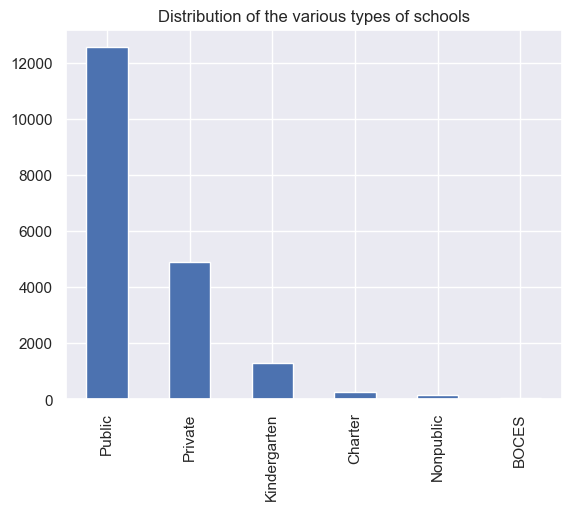

In [10]:
## Visualization of the various types of schools
sns.set_theme()
df.type.value_counts().plot(kind='bar')
plt.title('Distribution of the various types of schools');

##  The most common type of school in the dataset is the public school as seen in the above bar chart


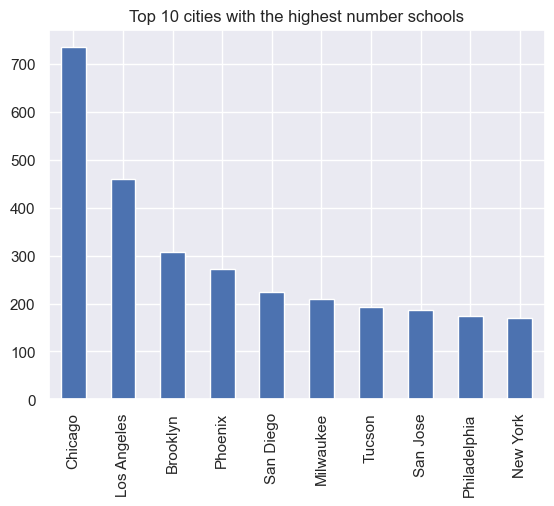

In [11]:
## Visualization of the cities with the most schools
df.city.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 cities with the highest number schools');

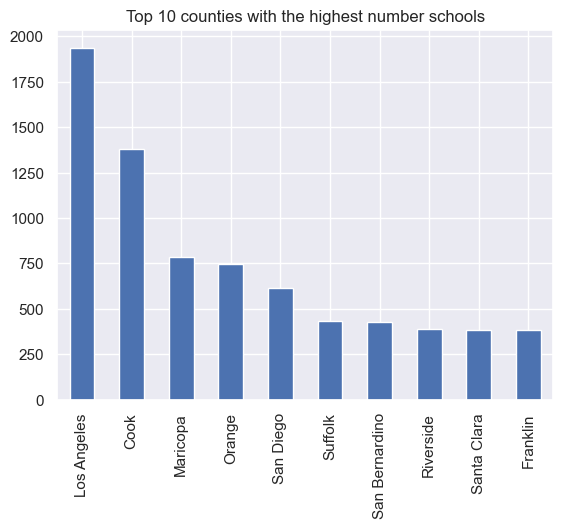

In [12]:
##Visualizing the counties with highest number of schools
df.county.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 counties with the highest number schools');

In [13]:
## Analysis the total number of students enrolled for the vaccination
df.enroll.describe()

count    31585.000000
mean       124.814469
std        165.119806
min          0.000000
25%         41.000000
50%         75.000000
75%        120.000000
max       6222.000000
Name: enroll, dtype: float64

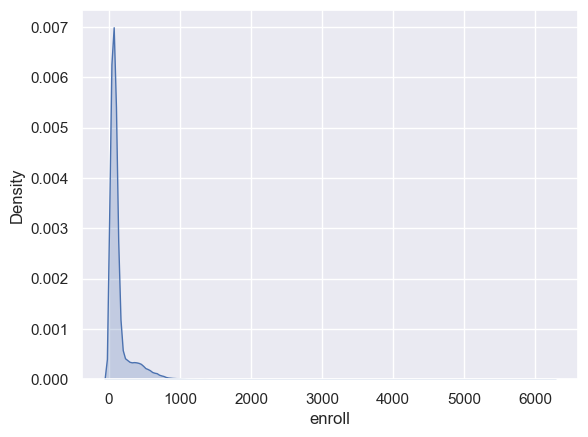

In [42]:
## Visualizing the distribution of the enroll column
sns.kdeplot(data=df.enroll, fill=True);

**As shown on the above kde plot, the data is not normally distributed, skewed to the right**

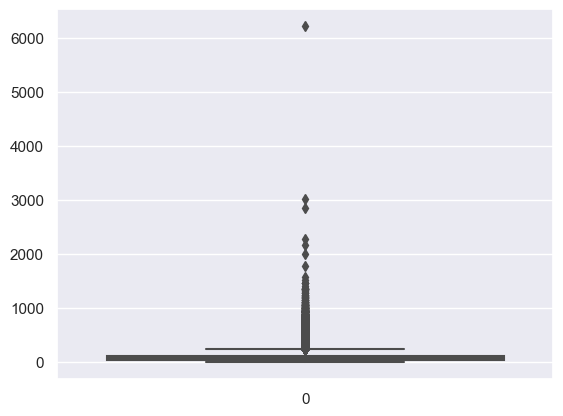

In [15]:
## Boxplot of the enroll
sns.boxplot(df.enroll);

### The boxplot above shows there are alot of extreme values


# Removal of outliers from the enroll column

In [16]:
low_quantile, high_quantile=df.enroll.quantile([0.25,0.75])

In [17]:
### Any school that enrolled students (low_quantile - 1.5 * IQR) or (high_quantile + 1.5* IQR)
IQR= high_quantile - low_quantile
lower_bound = low_quantile -1.5* IQR
upper_bound = high_quantile + 1.5*IQR
lower_bound
upper_bound


238.5

In [18]:
## Removal the schools from the datasets ( from a copy of the dataset)
df1= df.copy()


In [19]:
df1 = df1.drop(df1[df1['enroll'] < lower_bound].index)

In [20]:
df1=df1.drop(df1[df1['enroll'] >upper_bound].index)
# df1

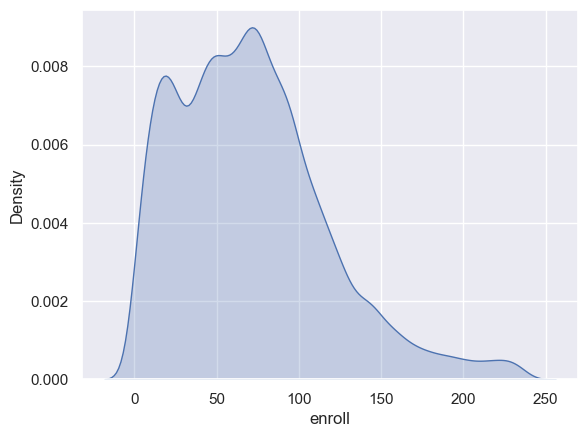

In [41]:
## kde of the transformed data
sns.kdeplot(data=df1.enroll, fill=True);

**The above kdeplot is a little normalized compared to previous before the removal of the extreme values**

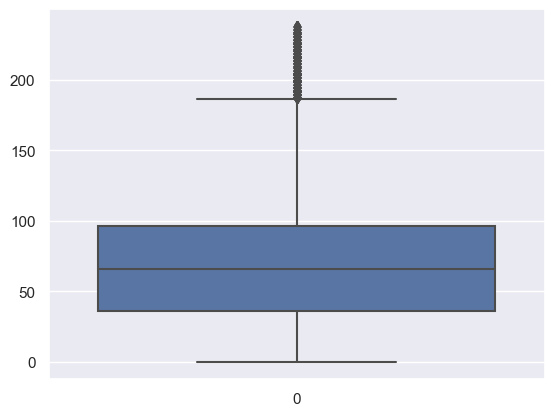

In [22]:
## Boxplot of the transformed values 
sns.boxplot(df1.enroll);

**The boxplot still shows some extreme values, but this is better the previous data**

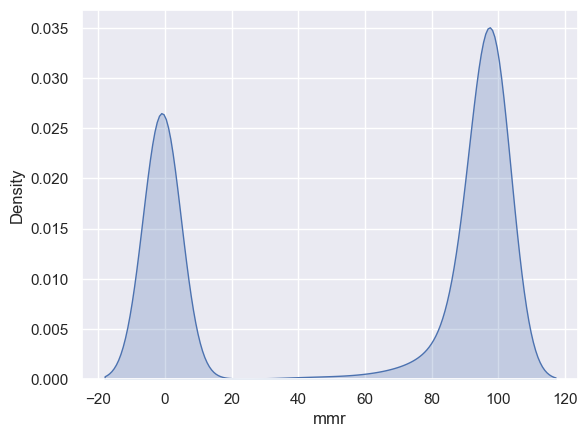

In [40]:
## Visualizing the distribution of the mmr data
sns.kdeplot(df1.mmr, fill=True); 

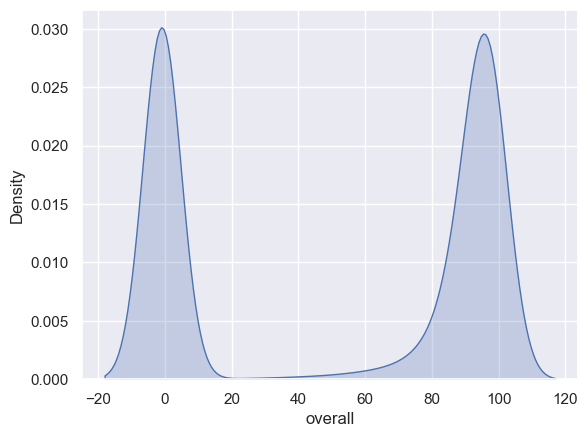

In [39]:
## Visualizing the distribution of the overall vaccination rate 
sns.kdeplot(df1.overall, fill=True);

## As shown above the both overall and MMR vaccination rate have a bimodal distribution pattern, with a peak around -1 and 100

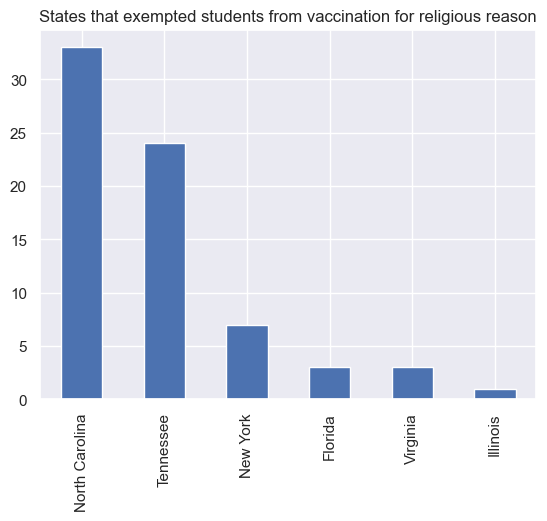

In [25]:
### Dataframe that contains students who were exempted from vaccinantion o/a religious reasons
df_xrel=df1[df1.xrel.notna()]
df_xrel['state'].value_counts().plot(kind='bar')
plt.title('States that exempted students from vaccination for religious reason');

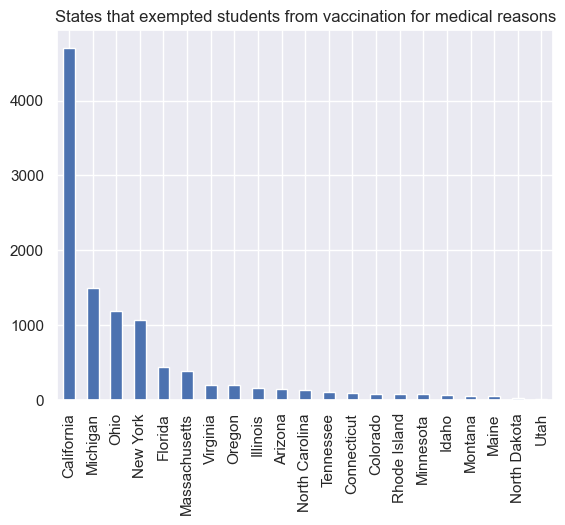

In [26]:
### Dataframe that contains students who were exempted from vaccination o/a medical reasons
df_xmed =df1[df1.xmed.notna()]
df_xmed['state'].value_counts().plot(kind='bar')
plt.title('States that exempted students from vaccination for medical reasons');

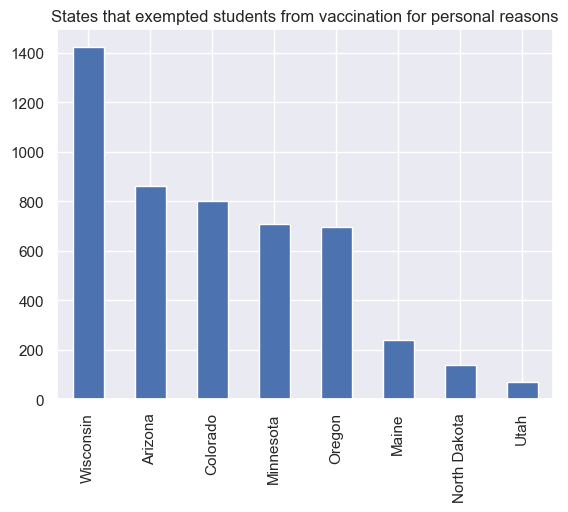

In [27]:
### Dataframe that contains students who were exempted from vaccination o/a personal reasons
df_xper =df1[df1.xper.notna()]
df_xper['state'].value_counts().plot(kind='bar')
plt.title('States that exempted students from vaccination for personal reasons');

# Plotly map of the distribution of the various schools in the dataset

In [28]:
# fig= px.scatter_geo(df1, lat='lat', lon ='lng', hover_name='name', color='county', scope='usa')
# fig.show()

# 🗺️ Explore: What types of schools have the highest overall and mmr vaccination rates?

## Schools with the highest overall and MMR vaccination

In [29]:
df_highest= df1[(df1['overall'] == 100) & (df1['mmr']==100)]
# df_highest

,index,state,year,name,type,city,county,enroll,mmr,overall,xrel,xmed,xper,lat,lng
9890,1,Colorado,2017-18,A New Generation,Kindergarten,NaN,Adams,3.0,100.0,100.0,NaN,NaN,NaN,39.839827,-104.193092
9891,2,Colorado,2017-18,Abiding Hope Preschool Inc,Kindergarten,NaN,Jefferson,4.0,100.0,100.0,NaN,NaN,NaN,39.601828,-105.127938
9893,4,Colorado,2017-18,Adventure Elementary,Kindergarten,NaN,Adams,32.0,100.0,100.0,NaN,NaN,NaN,39.836734,-104.991794
9899,10,Colorado,2017-18,Amesse Elementary,Kindergarten,NaN,Denver,63.0,100.0,100.0,NaN,NaN,NaN,39.793348,-104.841935
9900,11,Colorado,2017-18,Anastasis Academy,Kindergarten,NaN,Arapahoe,3.0,100.0,100.0,NaN,NaN,NaN,39.597882,-104.941443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41557,46,Vermont,2018-19,True North Wilderness Program,NaN,NaN,Washington,13.0,100.0,100.0,NaN,NaN,NaN,44.182683,-72.840110
41558,47,Vermont,2018-19,Vermont Day,NaN,NaN,Chittenden,51.0,100.0,100.0,NaN,NaN,NaN,44.360898,-73.235502
41562,51,Vermont,2018-19,Williamstown Elementary,NaN,NaN,Orange,192.0,100.0,100.0,NaN,NaN,NaN,44.123554,-72.545708
41564,53,Vermont,2018-19,Woodford Hollow,NaN,NaN,Bennington,18.0,100.0,100.0,NaN,NaN,NaN,42.894092,42.894092


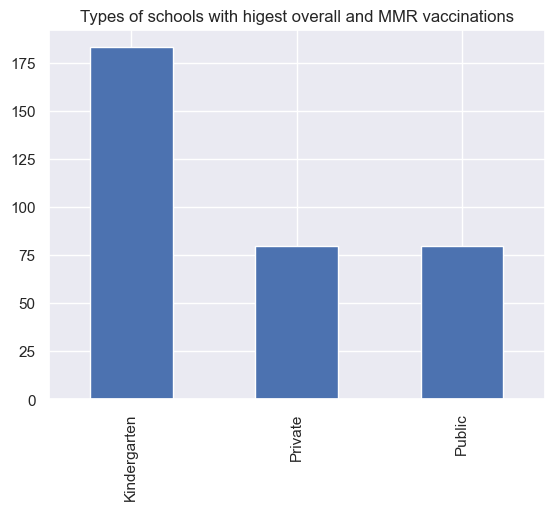

In [30]:
df_highest['type'].value_counts().plot(kind='bar')
plt.title('Types of schools with higest overall and MMR vaccinations');

# 📊 Visualize: Create a plot that visualizes the overall and mmr vaccination rates for the ten states with the highest number of schools.

In [31]:
## State with the highest number of schools 
df_state=df1.groupby('state')[['state']].value_counts().head(10).sort_values(ascending=False).reset_index(name='Number of schools')
df_state

,state,Number of schools
0,California,8043
1,Florida,2234
2,Arizona,1343
3,Colorado,1311
4,Illinois,1227
5,Connecticut,751
6,Idaho,475
7,Iowa,456
8,Maine,339
9,Arkansas,31


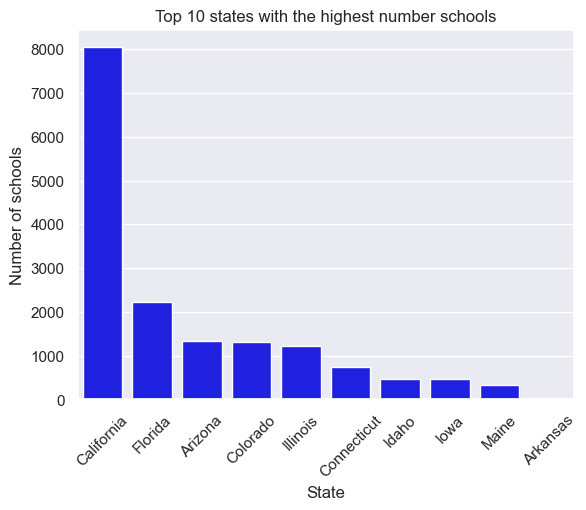

In [32]:
sns.barplot(x='state', y='Number of schools', data=df_state, color='blue')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.title('Top 10 states with the highest number schools');

In [33]:
## Subsetting data from the total dataset where state have some of the highest number of schools
df_stat=df[df['state'].isin(df_state.state)]

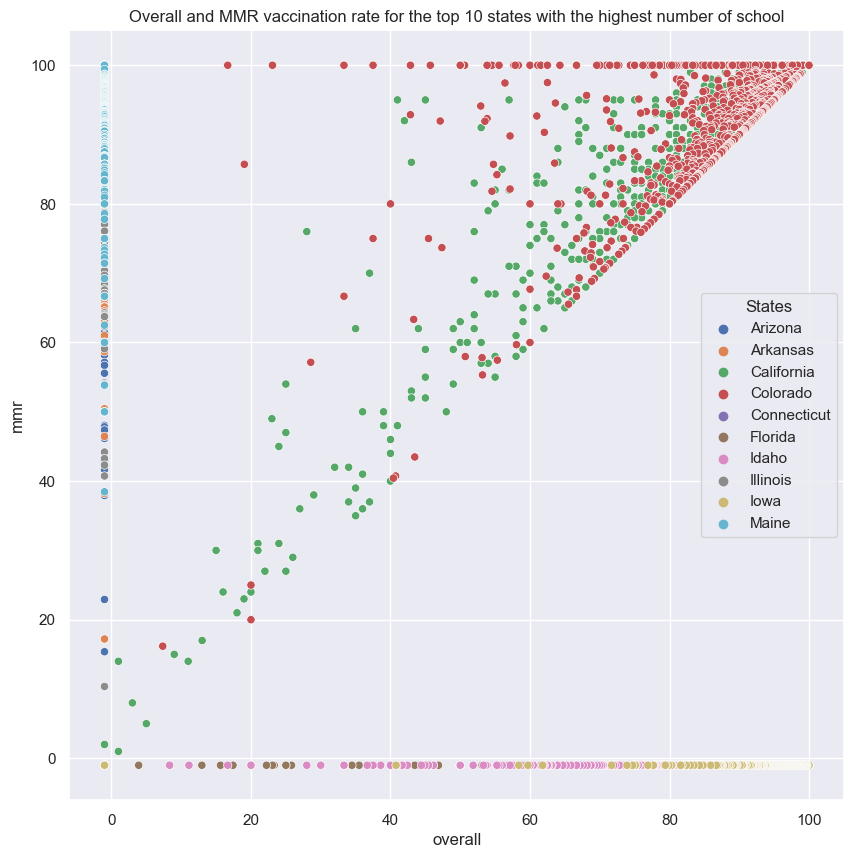

In [34]:
fig, ax= plt.subplots(figsize=(10,10))
sns.scatterplot(data= df_stat, x='overall', y='mmr', hue='state')
plt.title('Overall and MMR vaccination rate for the top 10 states with the highest number of school')
plt.legend(loc ='best', title='States');

# 🔎 Analyze: Does location affect the vaccination percentage of a school?

In [35]:
## There are multiple fields which give location information (state, county,city and lat&long)

# Performing an ANOVA test

In [36]:
## We group the data according to various state, and we take the overall vacinnation rate to 
## represent the vaccination percentage of a school
state_overall=df.groupby('state')['overall'].apply(list)
# state_overall

In [37]:
## We take each state and it overall vaccinate rate and put it in a group
groups=[]
for item in state_overall:
    groups.append(item)

In [38]:
# Perform ANOVA
f_value, p_value = stats.f_oneway(*groups)

# Print the results
print("F-value:", f_value)
print("p-value:", p_value)


F-value: 6400.107500881997
p-value: 0.0


**There is a statistically significant association between state and overall vaccination rate of a school,as shown by the above analysis of variance**

# Insights from the analysis
1. Public owned are the commonest type of schools in the dataset
2. Chicago has the highest number of schools 
3. The county with highest number schools is the Los Angeles
4. The California state has the highest number of schools in all the states
5. North Carolina state  has the highest number of students exempted from vaccination for religious reasons 
6. California state  has the highest number of students exempted from vaccination for genuine medical reasons
7. Wisconsin states is more likely to exempt students from vaccination for personal reasons, this is concerning because there could be countless reasons for which a student can be exempted from vaccination
8. Kindergarten schools have the highest overall and MMR vaccination compared to other school types, this is not surprising as most Kindergarten children are within the vaccination age for most vaccines
9. Schools in the Colorado state have the highest overall and mmr vaccinations compared to the other state, in California; there seems to be strong positive correlation between the overall vaccination rate and the mmr vaccination rate.
10. The state in which a school is located affects the overall vaccination rate of the school



# Call to action
The public health unit in Wiscosin should streghten the vaccination protocols in schools, as they are noted to have a very high of number students exempted from vaccination for personal reason
Despite the California state having the highest number of schools, they did not necessarily record the highest number of overall vaccination, vaccinations campigns should be intensified in this state,as more schools means more students and therefore high chance of outbreak in the event of an outbreak, more students should be vaccinated to achieve herd immunity.